# Avocado Project (Group E4)

### 1. Introduction and Motivation

**Dataset**: Avocado Prices  

The source we are using is the clean and dense dataset provided by **Kaggle**  
- Link: https://www.kaggle.com/datasets/neuromusic/avocado-prices  

Raw Avocado dataset was provided to Kaggle by **Hass Avocado Board**  
- Link: ​​https://hassavocadoboard.com/  
 

### 2. Data Preparation:

In [28]:
# Importing libraries
library(lubridate)
library(ggplot2)

#### A. Data Cleaning

In [29]:
# Import Data:
df = read.csv("avocado.csv", header = TRUE)
# Removing unused columns:
drops <- c("X","X4046","X4225","X4770","Total.Bags","Small.Bags","Large.Bags", "XLarge.Bags")
df = df[ , !(names(df) %in% drops)]
# Preview first 2 rows of data
head(df,2)

,Date,AveragePrice,Total.Volume,type,year,region
,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,2015-12-27,1.33,64236.62,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,conventional,2015,Albany


We verify that the data is nice and dense:

In [30]:
# Check for null values in dataframe
na_count = sum(is.na(df))
sprintf("The dataset contains %d na values", na_count)

[1] "The dataset contains 0 na values"

We then factorize all categorical variables in our dataset:

In [31]:
df$type = factor(df$type)
df$region = factor(df$region)
df$year = factor(df$year)
head(df,2)

,Date,AveragePrice,Total.Volume,type,year,region
,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,2015-12-27,1.33,64236.62,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,conventional,2015,Albany


#### B. Feature Transformation
As discussed in the proposal and proposal feedbacks, we will extract month information from the Data Column, as a categorical explanatory variable in our model.

In [32]:
df$Date <- ymd(df$Date)
# Extract the month number
df$Month <- factor(month(df$Date))
head(df,2)

,Date,AveragePrice,Total.Volume,type,year,region,Month
,<date>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,2015-12-27,1.33,64236.62,conventional,2015,Albany,12
2,2015-12-20,1.35,54876.98,conventional,2015,Albany,12


### 3. EDA

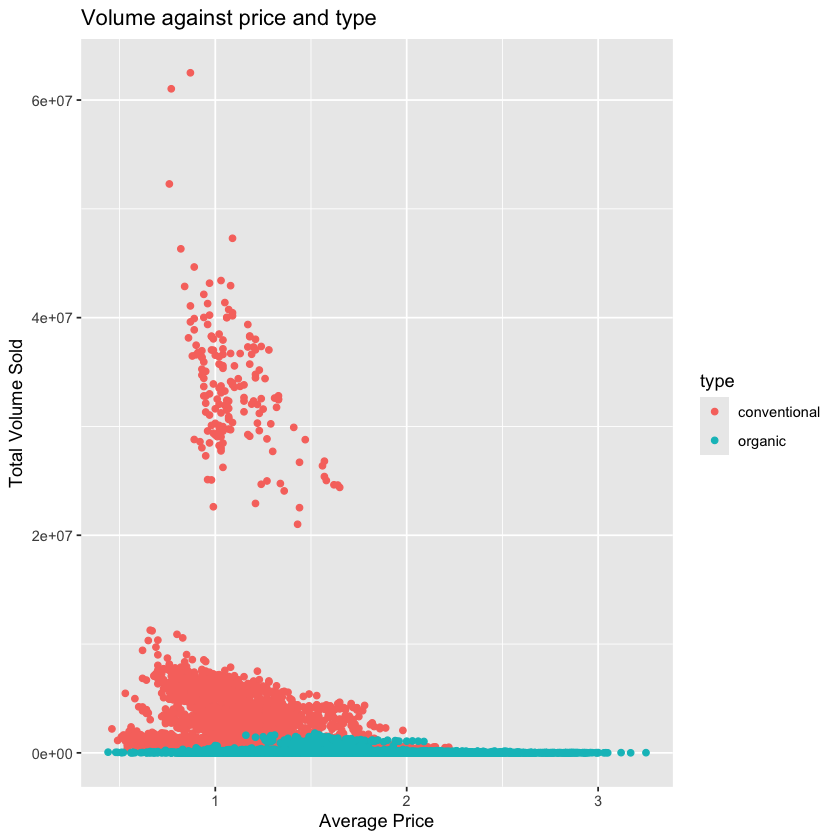

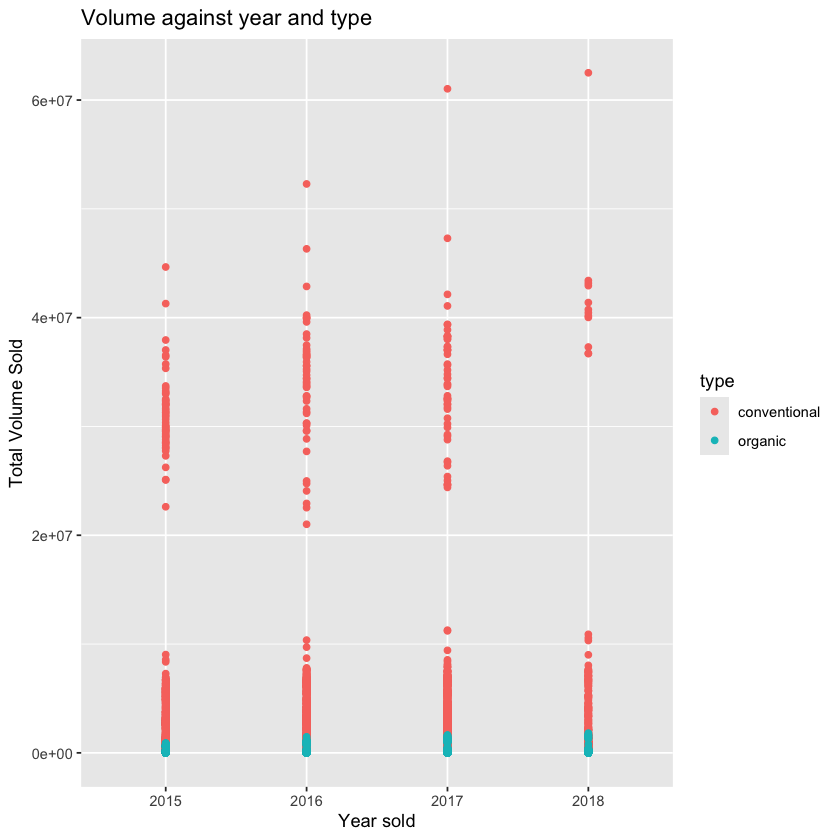

In [33]:
ggplot(df, aes(AveragePrice, Total.Volume, colour = type))+ 
  geom_point()+
  ggtitle("Volume against price and type")+
  xlab("Average Price")+
  ylab("Total Volume Sold")

ggplot(df, aes(year, Total.Volume, colour = type)) +
  geom_point()+
  ggtitle("Volume against year and type")+
  xlab("Year sold")+
  ylab("Total Volume Sold")

From these two plots, we see that there is a great difference between the
Volume of conventional and organic avocados sold.   
As such, we believe that it would make sense to analyze both individually

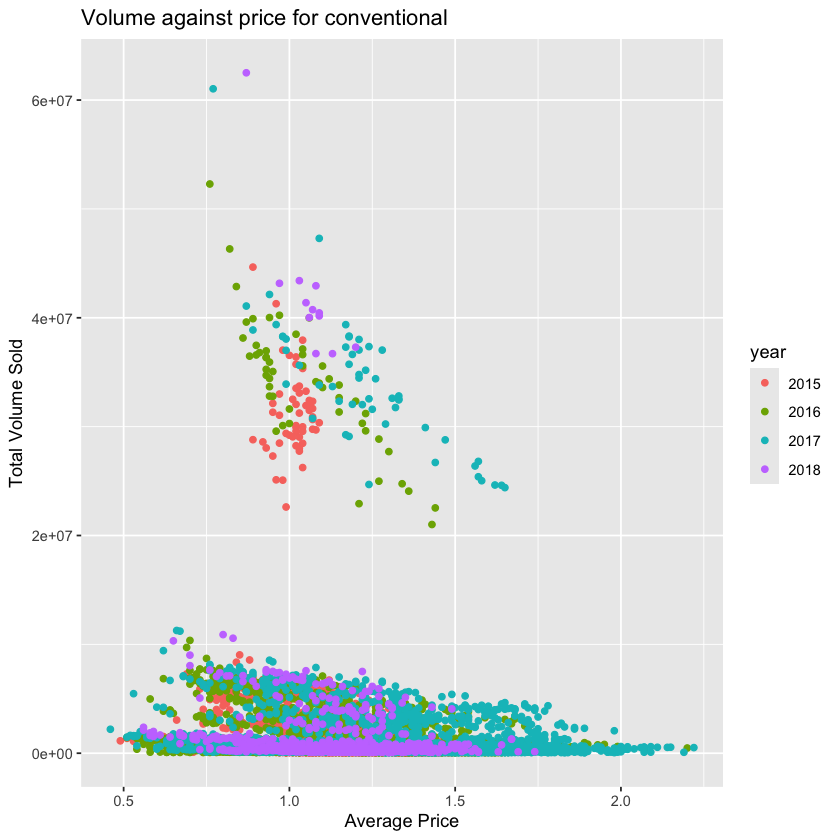

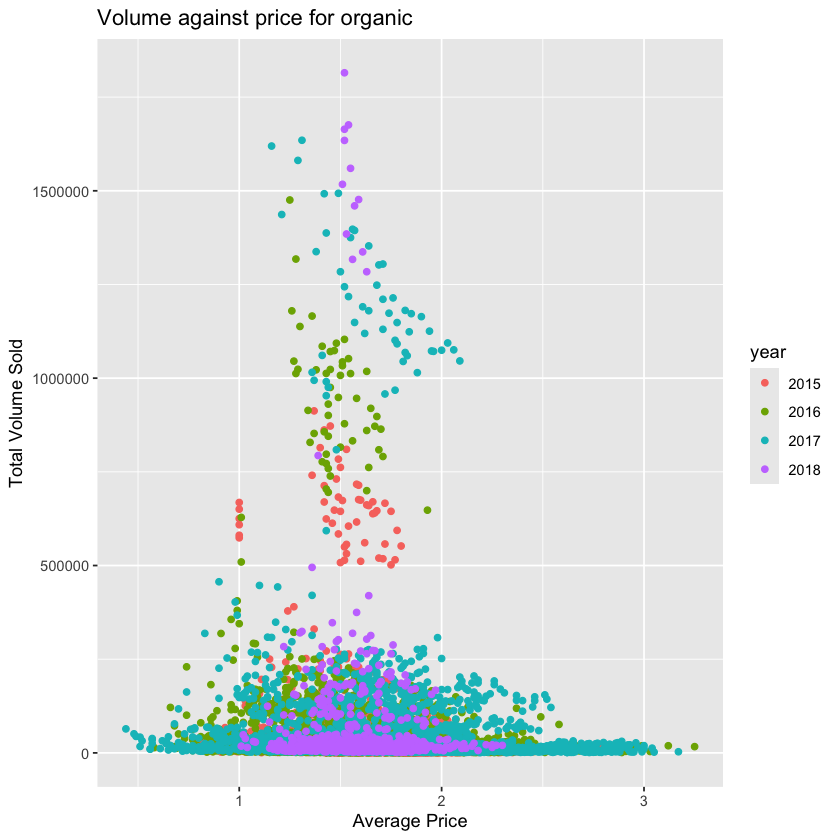

In [34]:
ggplot(subset(df, type == "conventional"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for conventional") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

ggplot(subset(df, type == "organic"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for organic") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

In both the conventional and the organic avocado plots, it can be seen that
there are two distinct groups, to see why there's this difference, we will
group by the other variables to see if we can identify the reason

Inspecting the data more closely, it can be seen that many of the top results 
are for total US/ regions of the US, aka west, east, and central. In order to
account for this, we can remove these points and analyze them separately
while doing this, we will also make two dataframes, one for conventional, and
one for organic

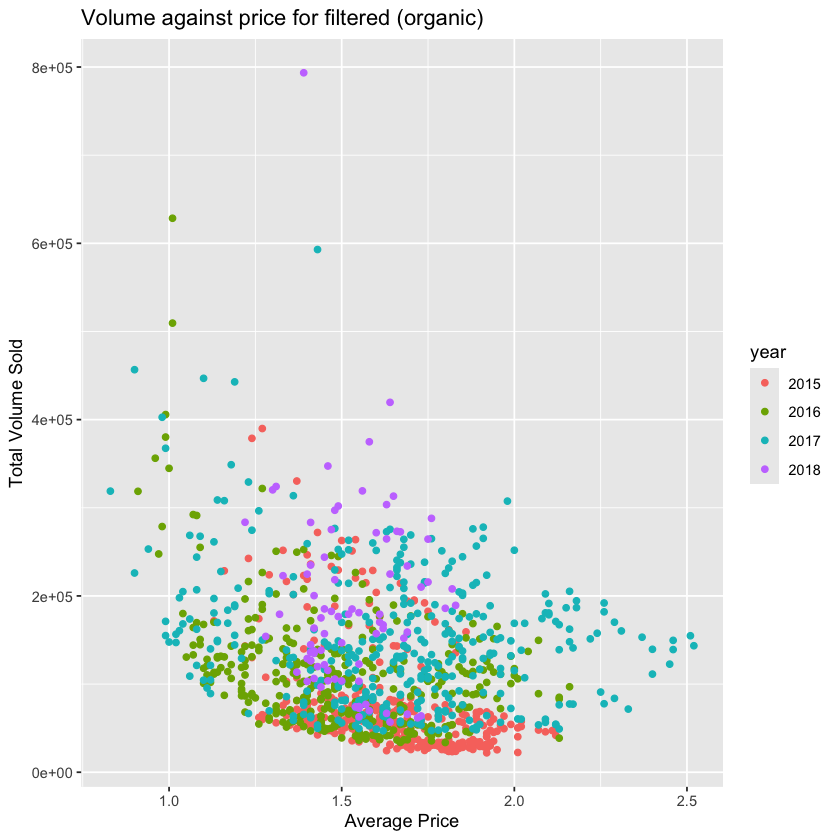

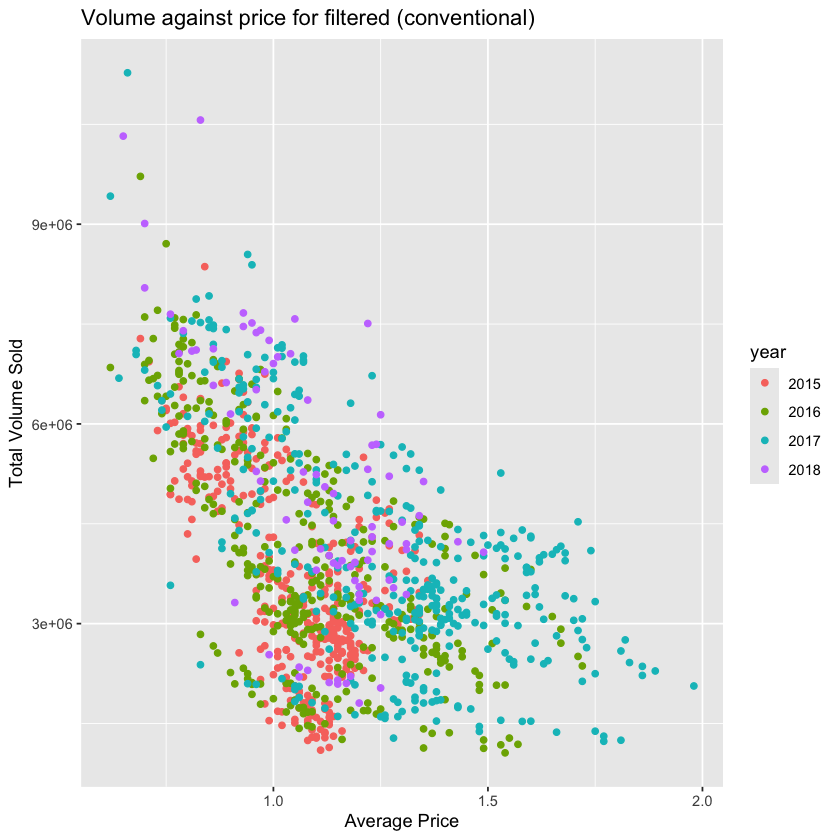

In [35]:
regions_to_include <- c("West", "SouthCentral", "SouthEast", 
                        "Midsouth", "GreatLakes", "Southeast", "Northeast",
                        "Plains")


# # Filter the dataframe to include the specified regions
df_filtered <- subset(df, (region %in% regions_to_include))

# Filter the dataframe to make one for organic and one for conventional

df_filtered_c <- subset(df_filtered, (type %in% "conventional"))
df_filtered_o <- subset(df_filtered, type %in% "organic")

# Once removing these results, the results become more consistent

ggplot(subset(df_filtered, type == "organic"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for filtered (organic)") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

ggplot(subset(df_filtered, type == "conventional"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for filtered (conventional)") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

### 4. Model Fitting

In [36]:
full_model_wo_int <- lm(Total.Volume ~ type + AveragePrice + year + Month + region , data = df_filtered)
summary(full_model_wo_int)


Call:
lm(formula = Total.Volume ~ type + AveragePrice + year + Month + 
    region, data = df_filtered)

Residuals:
     Min       1Q   Median       3Q      Max 
-1768804  -623581   -37369   549505  5397761 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4698643     129800  36.199  < 2e-16 ***
typeorganic        -3304003      60329 -54.766  < 2e-16 ***
AveragePrice       -1176507     104355 -11.274  < 2e-16 ***
year2016             129408      45582   2.839  0.00456 ** 
year2017             360618      46664   7.728 1.61e-14 ***
year2018             719284      80908   8.890  < 2e-16 ***
Month2               201444      79460   2.535  0.01130 *  
Month3                -8339      78040  -0.107  0.91491    
Month4               140051      85770   1.633  0.10263    
Month5               361277      84077   4.297 1.80e-05 ***
Month6               286029      88048   3.249  0.00118 ** 
Month7               184951      85259   2.169  0.03016 

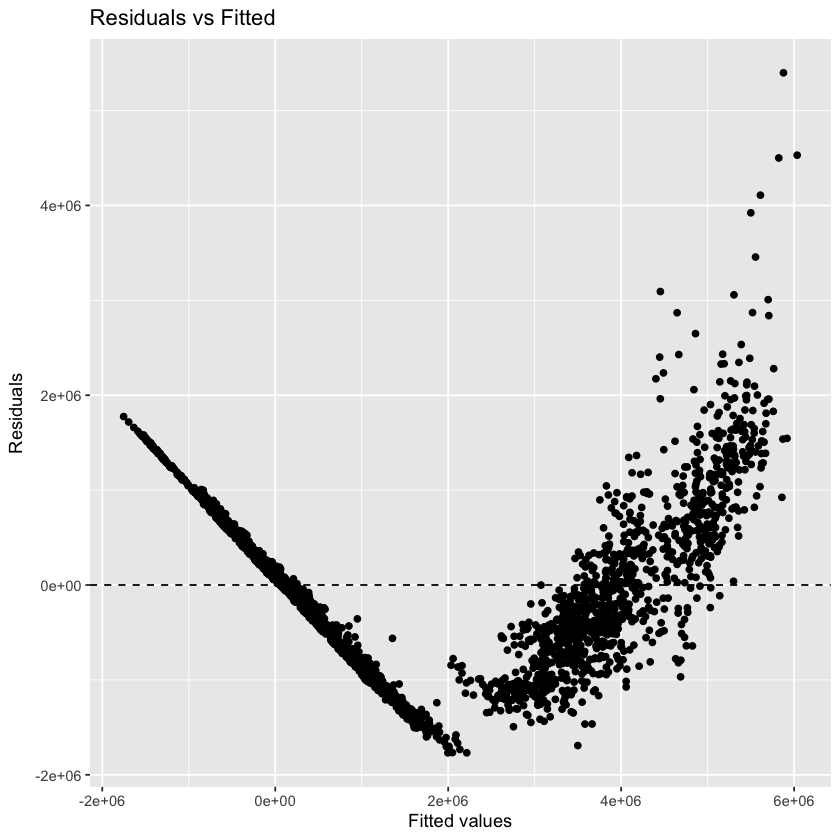

In [37]:
ggplot(full_model_wo_int, aes(.fitted, .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(x = "Fitted values", y = "Residuals") +
  ggtitle("Residuals vs Fitted")

In [38]:
full_model_w_int <- lm(Total.Volume ~ type * AveragePrice * year * Month * region , data = df_filtered)
summary(full_model_w_int)


Call:
lm(formula = Total.Volume ~ type * AveragePrice * year * Month * 
    region, data = df_filtered)

Residuals:
     Min       1Q   Median       3Q      Max 
-1148240   -12315      119    14509  1087229 

Coefficients: (252 not defined because of singularities)
                                                              Estimate
(Intercept)                                                    7467122
typeorganic                                                   -7371726
AveragePrice                                                  -4037679
year2016                                                       1911129
year2017                                                       -206776
year2018                                                       2621152
Month2                                                         5381931
Month3                                                         4584865
Month4                                                         3328332
Month5                 

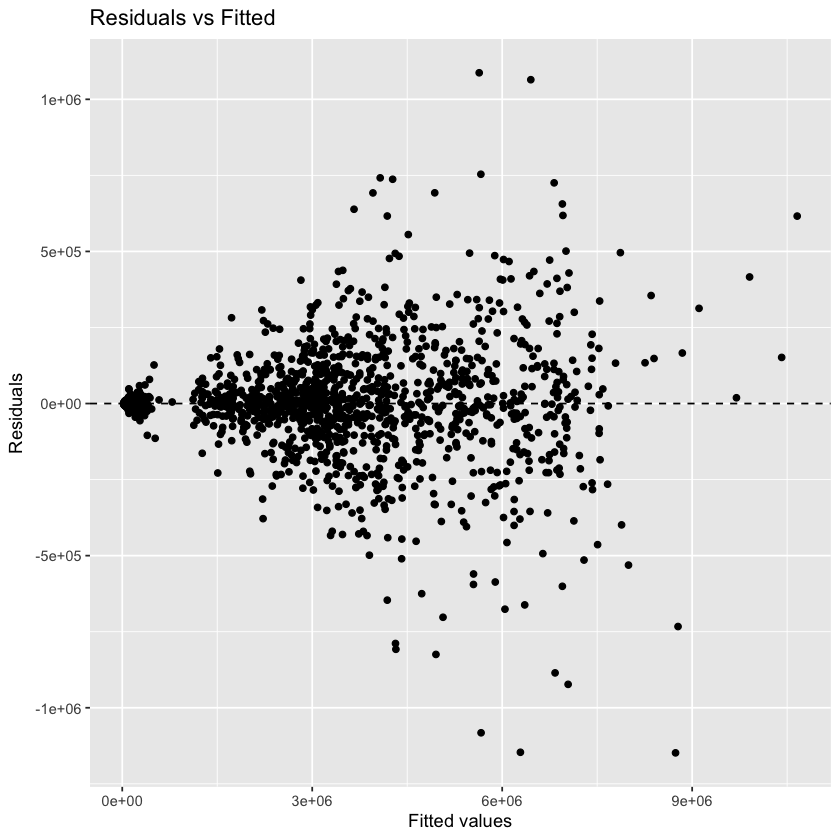

In [39]:
ggplot(full_model_w_int, aes(.fitted, .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(x = "Fitted values", y = "Residuals") +
  ggtitle("Residuals vs Fitted")